In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_pts =pd.read_csv('df_pts.csv', index_col=0)
df_sch = pd.read_csv('df_sch.csv', index_col=0)
df_tm = pd.read_csv('df_tm.csv', index_col=0)
df_tm1 = pd.read_csv('df_tm1.csv', index_col=0)

In [3]:
teams = df_tm.merge(df_tm1)

In [4]:
tm_owners = teams[['TeamID','Year','First','Last']]

In [5]:
total_matchups = df_pts.merge(tm_owners)


In [6]:
total_matchups['First'] = total_matchups['First'].str.capitalize()
total_matchups['Last'] = total_matchups['Last'].str.capitalize()

In [7]:
total_matchups.drop_duplicates(inplace=True)

In [8]:

total_matchups['Full Name'] = total_matchups['First'] + " "+ total_matchups['Last']

In [9]:
df_sch['Matchup_ID'] = df_sch['Year'].astype(str) + df_sch['Week'].astype(str)  + df_sch['HomeTeamId'].astype(str) + df_sch['AwayTeamId'].astype(str) 

In [10]:
df_sch_a = df_sch[['Year','Week','Matchup_ID','Type','AwayTeamId']].rename(columns={'AwayTeamId':'TeamID'})
df_sch_h = df_sch[['Year','Week','Matchup_ID','Type','HomeTeamId']].rename(columns={'HomeTeamId':'TeamID'})
df_sch_1 = pd.concat([df_sch_a,df_sch_h])

In [11]:
df_matchups = total_matchups.merge(df_sch_1,how='inner')

In [12]:
df_matchups['Actual_Winner'] = df_matchups.groupby('Matchup_ID')['Apts'].transform(lambda x: (x == x.max()).astype(int))
df_matchups['Optimal_Winner'] = df_matchups.groupby('Matchup_ID')['Opts'].transform(lambda x: (x == x.max()).astype(int))
df_matchups['ESPN_Winner'] = df_matchups.groupby('Matchup_ID')['Epts'].transform(lambda x: (x == x.max()).astype(int))

In [13]:

df_matchups_1 = df_matchups.loc[df_matchups['Full Name']!='Dave Miller']

In [14]:
df_matchups_1['Optimal_Missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Opts']
df_matchups_1['ESPN_missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Epts']

C:\Users\sethmiller_ryanlawn\AppData\Local\Temp\ipykernel_11396\1951970540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchups_1['Optimal_Missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Opts']
C:\Users\sethmiller_ryanlawn\AppData\Local\Temp\ipykernel_11396\1951970540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matchups_1['ESPN_missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Epts']


In [15]:

df_matchups_1.loc[df_matchups_1['Full Name']=='Nick  Vgts','Full Name']="Nick Vogts"
df_matchups_1.loc[df_matchups_1['Full Name']=='Nick Vgts','Full Name']="Nick Vogts"

In [16]:
df_sorted = df_matchups_1.sort_values(by=['Matchup_ID', 'TeamID']).reset_index(drop=True)

# Shift the Apts column up and down to align with the opponent's values
df_sorted['Opponent_Apts'] = df_sorted['Apts'].shift(-1)
df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Apts'] = df_sorted['Apts'].shift(1)

df_sorted['Opponent_Opts'] = df_sorted['Opts'].shift(-1)
df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Opts'] = df_sorted['Opts'].shift(1)

#df_sorted['Opponent_Opts'] = df_sorted['Opts'].shift(-1)
#df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Opts'] = df_sorted['Opts'].shift(1)

df_matchups_2 = df_matchups_1.merge(df_sorted)

In [176]:
df_Avg_Missed_Optimal = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name'])["Optimal_Missed_Pts"].mean().reset_index().sort_values(by='Optimal_Missed_Pts')

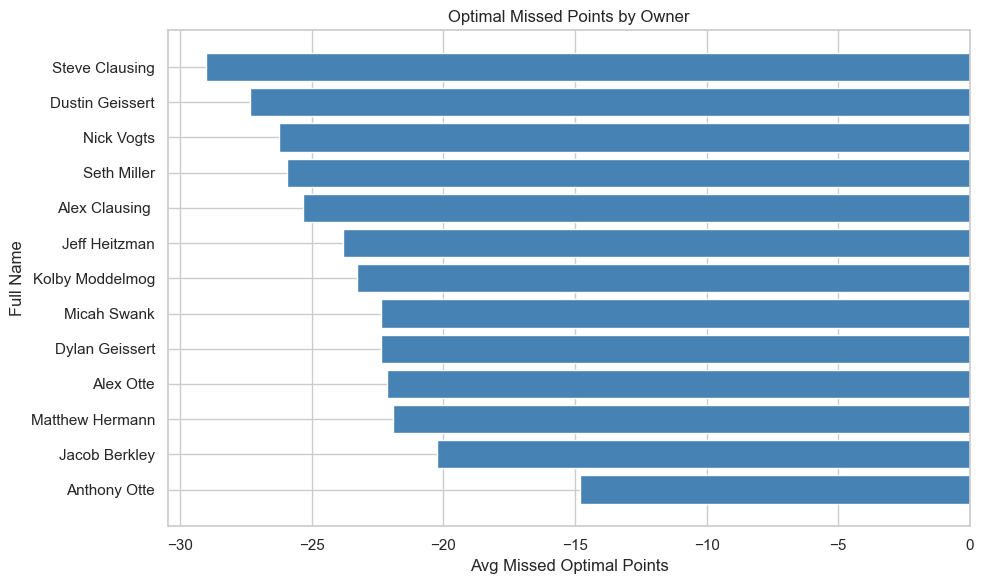

In [177]:
plt.figure(figsize=(10, 6))
plt.barh(df_Avg_Missed_Optimal['Full Name'], df_Avg_Missed_Optimal['Optimal_Missed_Pts'], color='steelblue')
plt.xlabel('Avg Missed Optimal Points')
plt.ylabel('Full Name')
plt.title('Optimal Missed Points by Owner')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
plt.tight_layout()

# Show plot
plt.show()

In [179]:
df_ESPN_Mngr = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name'])["ESPN_missed_Pts"].mean().reset_index().sort_values(by='ESPN_missed_Pts')


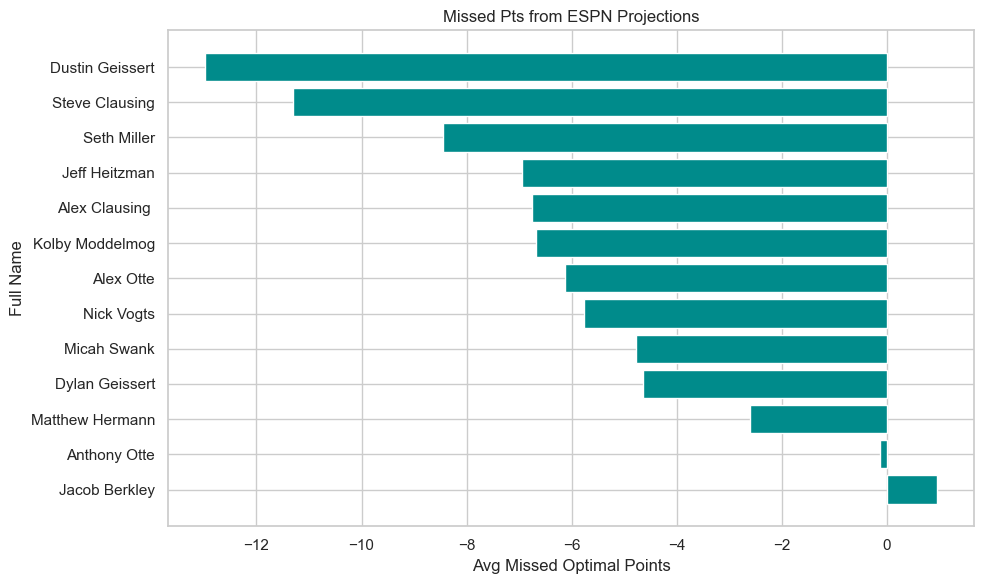

In [180]:
plt.figure(figsize=(10, 6))
plt.barh(df_ESPN_Mngr['Full Name'], df_ESPN_Mngr['ESPN_missed_Pts'], color='darkcyan')
plt.xlabel('Avg Missed Optimal Points')
plt.ylabel('Full Name')
plt.title('Missed Pts from ESPN Projections')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
plt.tight_layout()

# Show plot
plt.show()

In [182]:
df_opts_season =df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])["Optimal_Missed_Pts"].mean().reset_index().sort_values(by='Optimal_Missed_Pts',ascending=False)


In [183]:
df_opts_wins = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])[["Opts",'Actual_Winner']].sum().reset_index().sort_values(by='Opts',ascending=True)


In [184]:

df_Opts_Wins_Yrs = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name']).agg({
    'Opts': 'sum',
    'Actual_Winner': 'sum',
    'Optimal_Winner': 'sum',
    'Year': 'nunique',
    'Matchup_ID': 'count'}).reset_index()

In [185]:
df_Opts_Wins_Yrs['Opts/gm'] = (df_Opts_Wins_Yrs['Opts']/df_Opts_Wins_Yrs['Matchup_ID']).round(1)
df_Opts_Wins_Yrs['Opts/yr'] = (df_Opts_Wins_Yrs['Opts']/df_Opts_Wins_Yrs['Year']).round(1)
df_Opts_Wins_Yrs['Wins/yr'] = (df_Opts_Wins_Yrs['Actual_Winner']/df_Opts_Wins_Yrs['Year']).round(1)

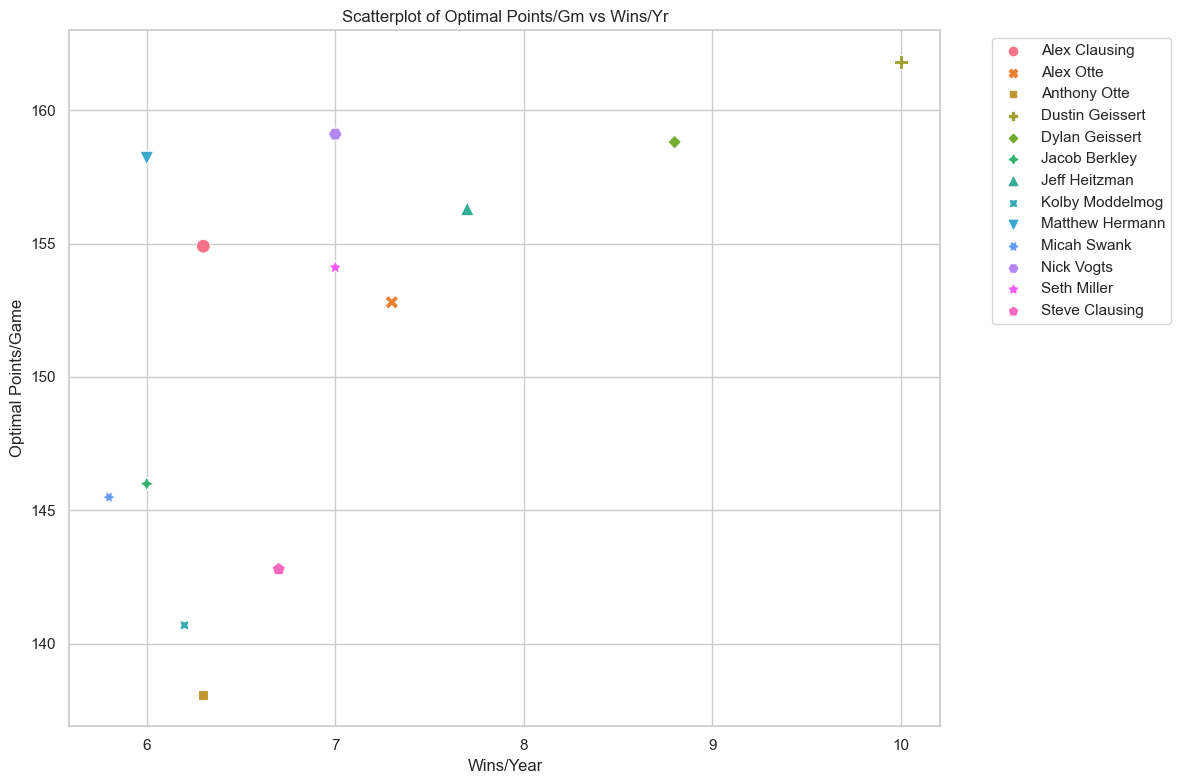

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the scatterplot
sns.scatterplot(data=df_Opts_Wins_Yrs, x='Wins/yr', y='Opts/gm', hue='Full Name', style='Full Name', s=100)

# Add titles and labels
plt.title('Scatterplot of Optimal Points/Gm vs Wins/Yr')
plt.xlabel('Wins/Year')
plt.ylabel('Optimal Points/Game')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [187]:
df_opts_wins = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])[["Opts",'Actual_Winner']].sum().reset_index().sort_values(by='Opts',ascending=True)



In [188]:

df_opts_wins['Name_Yr'] = df_opts_wins['Full Name']+"_"+df_opts_wins['Year'].astype("str")

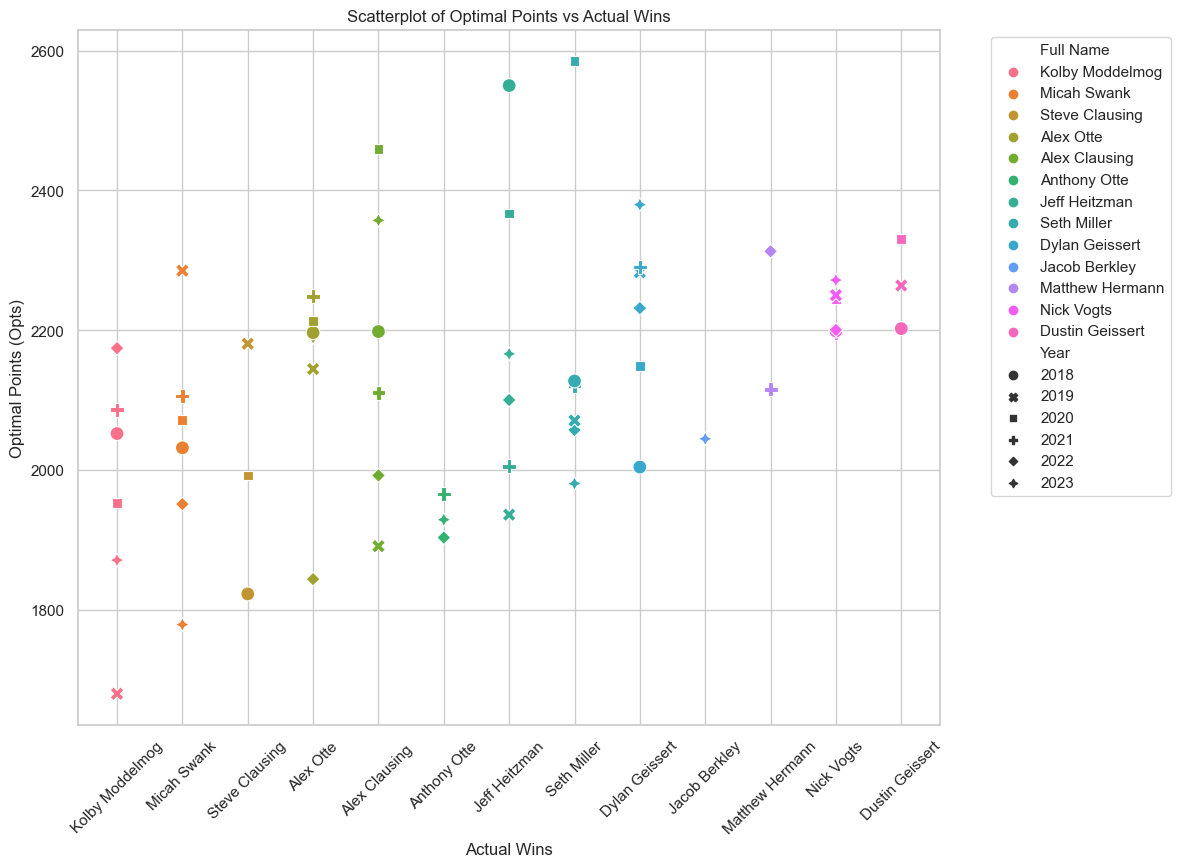

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the scatterplot
sns.scatterplot(data=df_opts_wins, x='Full Name', y='Opts', hue='Full Name', style='Year', s=100)

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Actual Wins')
plt.xlabel('Actual Wins')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()


In [190]:
#df_matchups_2

In [222]:
df_matchup_stats = df_matchups_2.loc[df_matchups_2['Type']=='Regular'].groupby(['Full Name',"Year"]).agg({
    'Optimal_Missed_Pts': 'sum',
    'Opts': 'sum',
    'Opponent_Opts': 'sum',
    'Opponent_Apts': 'sum',
    'Actual_Winner': 'sum',
    'Optimal_Winner': 'sum',
    'ESPN_Winner': 'sum',
    'Matchup_ID': 'count'}).reset_index()

In [223]:

df_matchup_stats['Adjusted_Wins'] = df_matchup_stats['Optimal_Winner']-df_matchup_stats['Actual_Winner']

In [224]:

df_matchup_stats['Name_Year'] = df_matchup_stats['Full Name'] + ' ' + df_matchup_stats['Year'].astype(str)

In [225]:

df_matchup_stats.sort_values(by='Adjusted_Wins', inplace=True)

In [226]:
df_mstats_short = df_matchup_stats.loc[(df_matchup_stats['Adjusted_Wins']>1)|(df_matchup_stats['Adjusted_Wins']< -1)]


In [227]:
df_matchup_stats

,Full Name,Year,Optimal_Missed_Pts,Opts,Opponent_Opts,Opponent_Apts,Actual_Winner,Optimal_Winner,ESPN_Winner,Matchup_ID,Adjusted_Wins,Name_Year
16,Dustin Geissert,2019,-376.4,2264.0,2203.3,1617.0,11,6,9,14,-5,Dustin Geissert 2019
53,Seth Miller,2020,-404.1,2584.9,2238.0,1785.4,12,9,11,14,-3,Seth Miller 2020
57,Steve Clausing,2018,-303.4,1822.9,2184.4,1784.4,6,3,5,14,-3,Steve Clausing 2018
31,Kolby Moddelmog,2018,-311.1,2052.3,2115.4,1683.8,8,6,8,14,-2,Kolby Moddelmog 2018
43,Micah Swank,2022,-171.2,1951.4,2058.0,1763.7,8,6,7,14,-2,Micah Swank 2022
21,Dylan Geissert,2021,-268.7,2290.7,1988.7,1637.7,10,8,11,14,-2,Dylan Geissert 2021
11,Alex Otte,2023,-236.5,2189.6,2116.7,1723.0,10,8,9,14,-2,Alex Otte 2023
10,Alex Otte,2022,-177.4,1844.1,2054.1,1834.1,6,4,4,14,-2,Alex Otte 2022
54,Seth Miller,2021,-251.6,2120.9,2058.9,1769.4,9,7,9,14,-2,Seth Miller 2021
8,Alex Otte,2020,-380.2,2213.3,2286.3,1809.3,6,4,6,14,-2,Alex Otte 2020


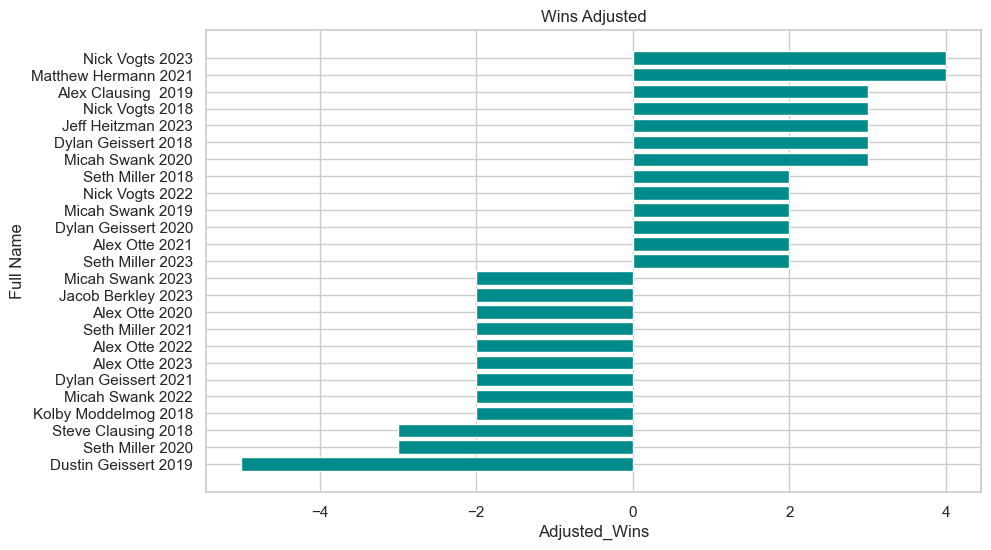

In [228]:
plt.figure(figsize=(10, 6))
plt.barh(df_mstats_short['Name_Year'], df_mstats_short['Adjusted_Wins'], color='darkcyan')
plt.xlabel('Adjusted_Wins')
plt.ylabel('Full Name')
plt.title('Wins Adjusted')
#plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
#plt.tight_layout()

# Show plot
plt.show()

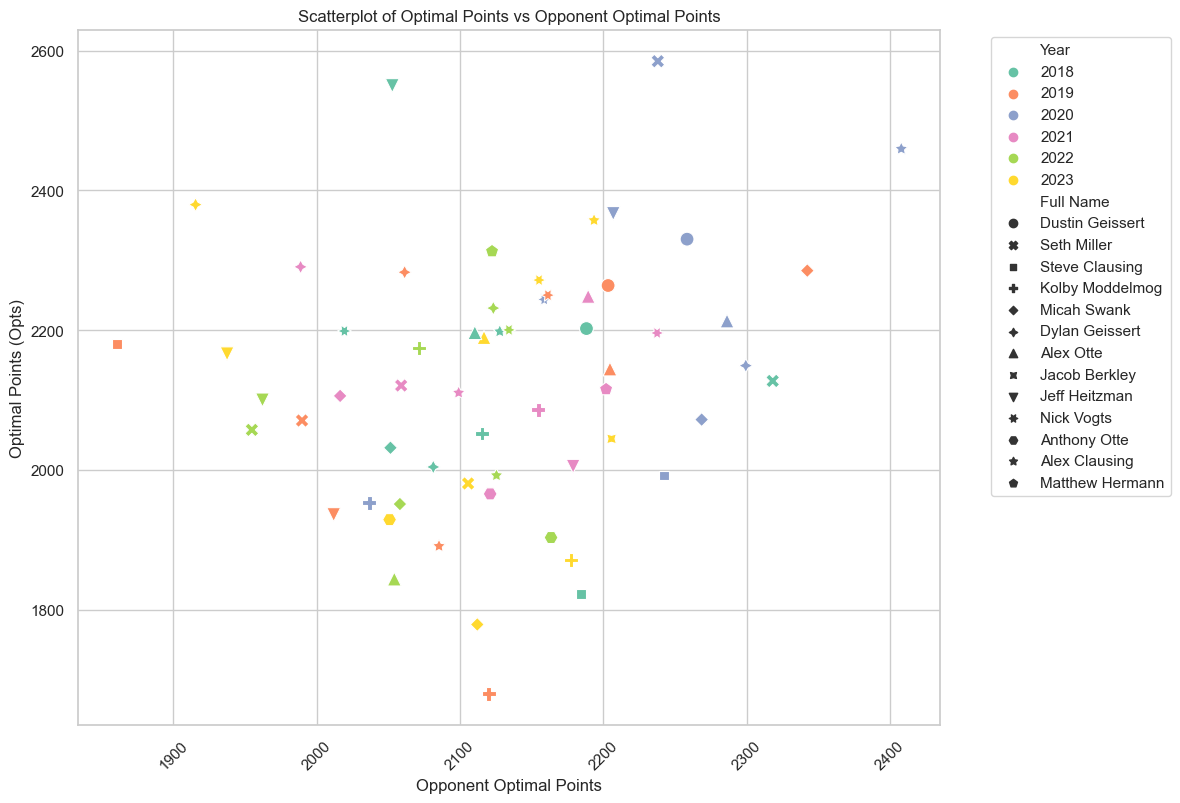

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Opponent_Opts', y='Opts', hue='Year', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Opponent Optimal Points')
plt.xlabel('Opponent Optimal Points')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [230]:
df_matchup_stats['Year'] = df_matchup_stats['Year'].astype("str")

In [231]:
yearly_avg = df_matchup_stats.groupby('Year')['Opponent_Opts'].mean().reset_index().rename(columns={'Opponent_Opts': 'Yearly_Avg_Opponent_Opts'})

In [232]:
df_matchup_stats = df_matchup_stats.merge(yearly_avg, on='Year')

In [233]:
df_matchup_stats['Diff_Opponent_Opts'] = df_matchup_stats['Opponent_Opts'] - df_matchup_stats['Yearly_Avg_Opponent_Opts']

In [234]:

import plotly.express as px
# Create the scatterplot
fig = px.scatter(
    df_matchup_stats, 
    x='Diff_Opponent_Opts', 
    y='Opts', 
    color='Year', 
    symbol='Full Name',
    size_max=100,
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Strength of Schedule',
    yaxis_title='Optimal Points (Opts)',
    legend_title='Full Name',
    height=500,
    margin=dict(l=0, r=0, t=50, b=0),
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

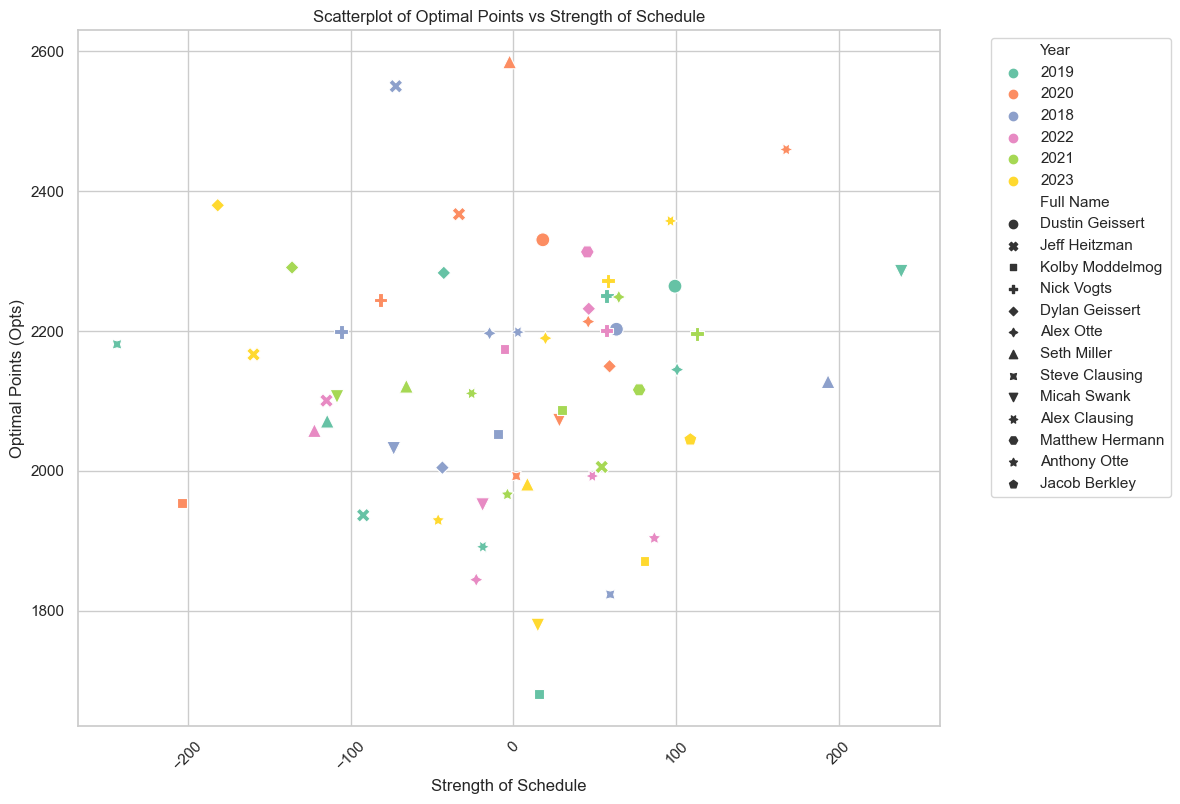

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Diff_Opponent_Opts', y='Opts', hue='Year', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Strength of Schedule')
plt.xlabel('Strength of Schedule')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [236]:
df_matchup_stats['Extra_Pts_Against/Game'] = df_matchup_stats['Diff_Opponent_Opts']/df_matchup_stats['Matchup_ID']

In [237]:
df_SoS = df_matchup_stats.groupby(['Full Name'])['Diff_Opponent_Opts'].sum().reset_index().sort_values(by='Diff_Opponent_Opts')

In [239]:
df_SoS_Yrs = df_Opts_Wins_Yrs.merge(df_SoS)

In [240]:
df_SoS_Yrs['Extra_Pts_Against/Game'] = df_SoS_Yrs['Diff_Opponent_Opts']/df_SoS_Yrs['Matchup_ID']

In [241]:
df_SoS_Yrs.loc[df_SoS_Yrs['Full Name']!='Jacob Berkley']

,Full Name,Opts,Actual_Winner,Optimal_Winner,Year,Matchup_ID,Opts/gm,Opts/yr,Wins/yr,Diff_Opponent_Opts,Extra_Pts_Against/Game
0,Alex Clausing,13009.2,38,41,6,84,154.9,2168.2,6.3,271.13,3.227738
1,Alex Otte,12836.7,44,39,6,84,152.8,2139.5,7.3,193.73,2.306310
2,Anthony Otte,5798.5,19,17,3,42,138.1,1932.8,6.3,36.83,0.876905
3,Dustin Geissert,6796.7,30,23,3,42,161.8,2265.6,10.0,180.70,4.302381
4,Dylan Geissert,13338.9,53,55,6,84,158.8,2223.2,8.8,-298.37,-3.552024
6,Jeff Heitzman,13125.3,46,48,6,84,156.3,2187.6,7.7,-417.87,-4.974643
7,Kolby Moddelmog,11817.7,37,34,6,84,140.7,1969.6,6.2,-92.17,-1.097262
8,Matthew Hermann,4428.7,12,15,2,28,158.2,2214.4,6.0,122.70,4.382143
9,Micah Swank,12226.0,35,35,6,84,145.5,2037.7,5.8,80.93,0.963452
10,Nick Vogts,13361.6,42,51,6,84,159.1,2226.9,7.0,98.33,1.170595


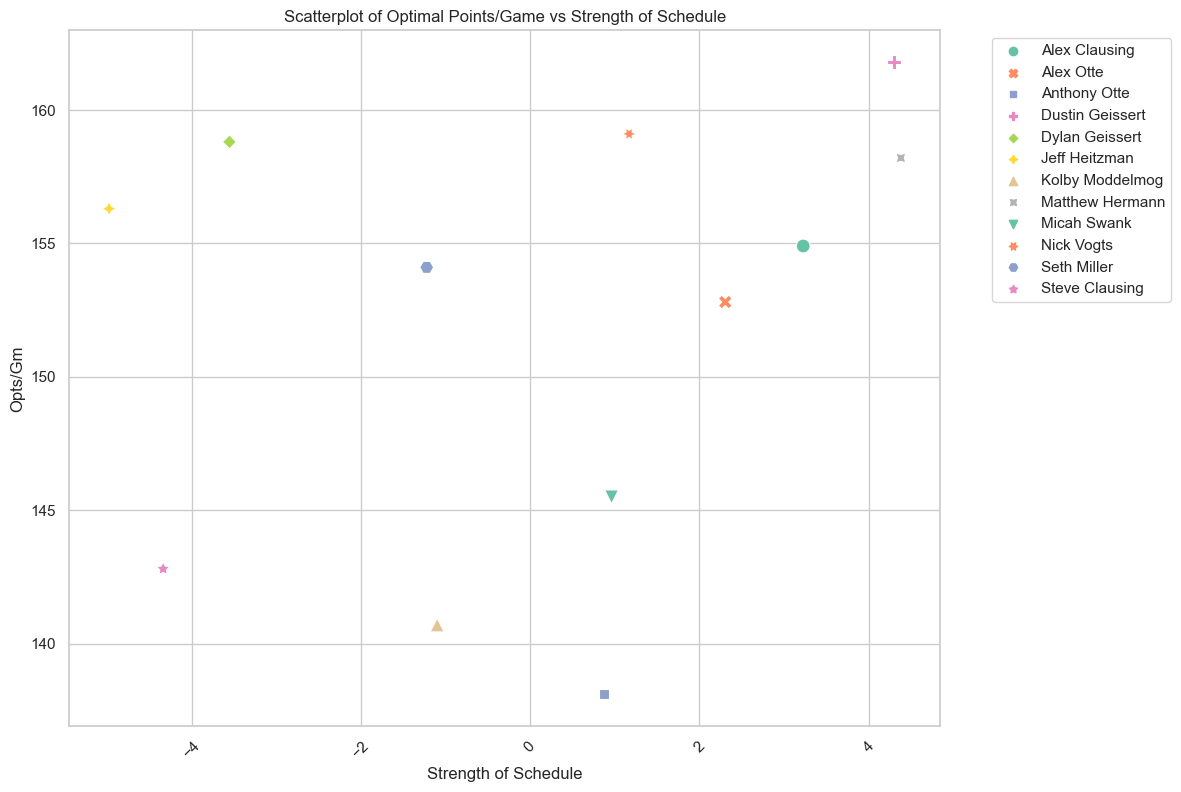

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_SoS_Yrs.loc[df_SoS_Yrs['Full Name']!='Jacob Berkley'], x='Extra_Pts_Against/Game', y='Opts/gm', hue='Full Name', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points/Game vs Strength of Schedule')
plt.xlabel('Strength of Schedule')
plt.ylabel('Opts/Gm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [243]:
df_SoS_Yrs['Win_Percentage'] = ((df_SoS_Yrs['Actual_Winner']/df_SoS_Yrs['Matchup_ID'])*100).round(2)
df_SoS_Yrs['Optimal_Win_Percentage'] = ((df_SoS_Yrs['Optimal_Winner']/df_SoS_Yrs['Matchup_ID'])*100).round(2)

In [244]:
df_SoS_Yrs

,Full Name,Opts,Actual_Winner,Optimal_Winner,Year,Matchup_ID,Opts/gm,Opts/yr,Wins/yr,Diff_Opponent_Opts,Extra_Pts_Against/Game,Win_Percentage,Optimal_Win_Percentage
0,Alex Clausing,13009.2,38,41,6,84,154.9,2168.2,6.3,271.13,3.227738,45.24,48.81
1,Alex Otte,12836.7,44,39,6,84,152.8,2139.5,7.3,193.73,2.306310,52.38,46.43
2,Anthony Otte,5798.5,19,17,3,42,138.1,1932.8,6.3,36.83,0.876905,45.24,40.48
3,Dustin Geissert,6796.7,30,23,3,42,161.8,2265.6,10.0,180.70,4.302381,71.43,54.76
4,Dylan Geissert,13338.9,53,55,6,84,158.8,2223.2,8.8,-298.37,-3.552024,63.10,65.48
5,Jacob Berkley,2044.7,6,4,1,14,146.0,2044.7,6.0,108.73,7.766429,42.86,28.57
6,Jeff Heitzman,13125.3,46,48,6,84,156.3,2187.6,7.7,-417.87,-4.974643,54.76,57.14
7,Kolby Moddelmog,11817.7,37,34,6,84,140.7,1969.6,6.2,-92.17,-1.097262,44.05,40.48
8,Matthew Hermann,4428.7,12,15,2,28,158.2,2214.4,6.0,122.70,4.382143,42.86,53.57
9,Micah Swank,12226.0,35,35,6,84,145.5,2037.7,5.8,80.93,0.963452,41.67,41.67


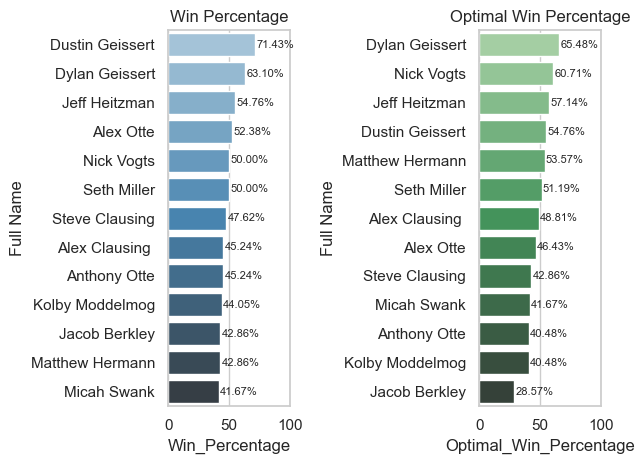

In [214]:
# Create the first subplot for Win Percentage
plt.subplot(1, 2, 1)
sns.barplot(x='Win_Percentage', y='Full Name', data=df_SoS_Yrs.sort_values(by="Win_Percentage",ascending=False), palette='Blues_d')
plt.title('Win Percentage')

plt.xlim(0, 100)

# Add percentage labels on the bars
for index, value in enumerate(df_SoS_Yrs.sort_values(by="Win_Percentage",ascending=False)['Win_Percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=8)

# Create the second subplot for Optimal Win Percentage
plt.subplot(1, 2, 2)
sns.barplot(x='Optimal_Win_Percentage', y='Full Name', data=df_SoS_Yrs.sort_values(by="Optimal_Win_Percentage",ascending=False), palette='Greens_d')
plt.title('Optimal Win Percentage')

plt.xlim(0, 100)

# Add percentage labels on the bars
for index, value in enumerate(df_SoS_Yrs.sort_values(by="Optimal_Win_Percentage",ascending=False)['Optimal_Win_Percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=8)


# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

In [249]:
df_matchup_stats['Opponenet Realized Pts %'] = ((df_matchup_stats['Opponent_Apts']/df_matchup_stats['Opponent_Opts'])*100).round(2)

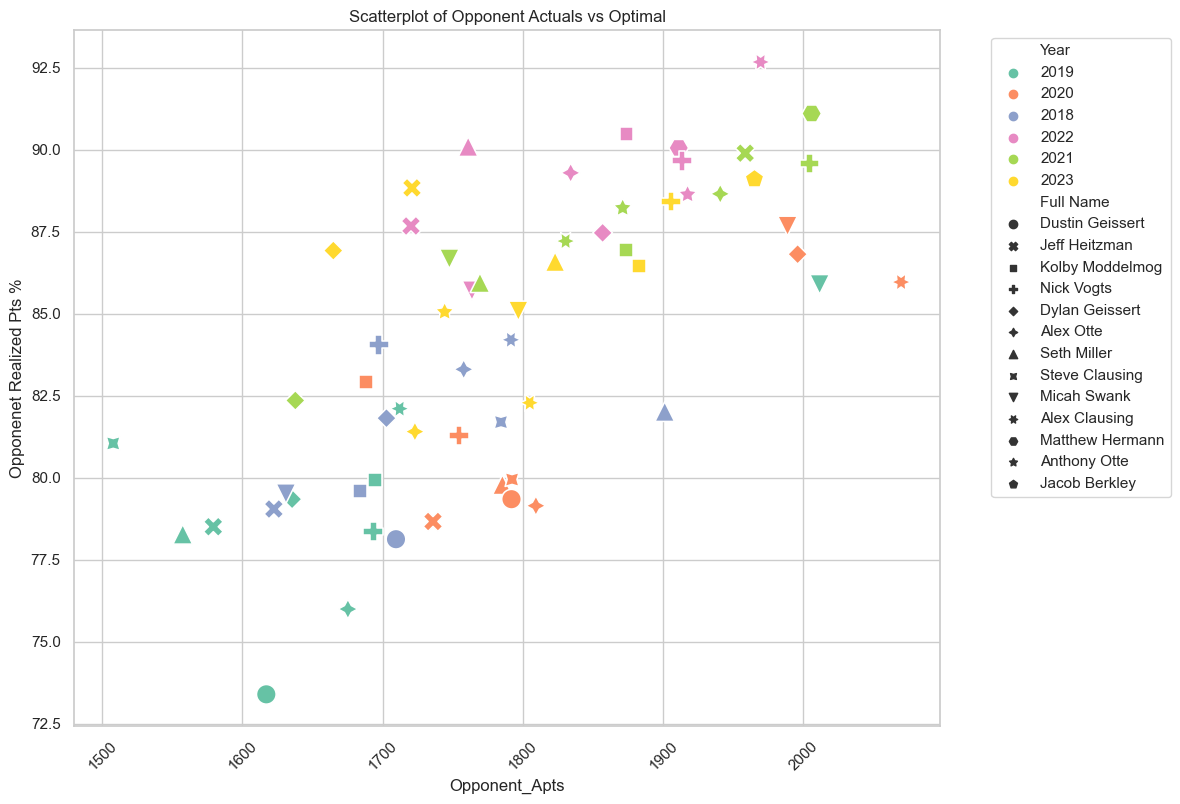

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Opponent_Apts', y='Opponenet Realized Pts %', hue='Year', style='Full Name', s=200, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Opponent Actuals vs Optimal')
plt.xlabel('Opponent_Apts')
plt.ylabel('Opponenet Realized Pts %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()